<a href="https://colab.research.google.com/github/Fet-elena/proba/blob/main/Task3_dmrf_Fetisova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Для домашнего задания №1

In [ ]:
import requests
import pandas as pd
import numpy as np
import pickle as pkl

class Baza_domrf:
    def __init__(self):
    self.offset_ = 1
    self.limit_ = 100
    self.baza = []
  def get_baza(self):
    while True:
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        res = requests.get(url)
        objects_data = res.json()
        self.baza.extend(objects_data.get('data').get('list'))
        self.offset_ = self.offset_ + self.limit_
        if len(objects_data.get('data').get('list')) < 100:
          break





In [ ]:
class Baza_domrf_analys:
  def __init__(self,baza):
    self.df = pd.DataFrame(baza)
    self.df_stroj = self.df[self.df.siteStatus == 'Строящиеся']

  def to_excel(self):
    self.df_stroj.to_excel ('stroj.xlsx')

  def to_pkl(self):
    self.df_stroj.to_pickle ('stroj.pkl')



# Для домашнего задания №2

In [28]:
import requests
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

class Baza_import:
  def __init__(self):
    self.df = pd.DataFrame()

  def import_baza(self):
    with open("stroj.pkl", "rb") as f:
      object = pkl.load(f)
    self.df = pd.DataFrame(object)

  def index_stroj(self):
    self.df.index = np.arange(self.df.shape[0]) #индексируем от 0 до количества строк в таблице
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
      print(self.df.isnull().sum())   # вывод всех столбцов с количеством в них пропусков

  def delete_stroj(self, cols):
    self.df.drop(columns=cols, axis= 1 , inplace= True)
    print(self.df.isnull().sum())   # вывод всех столбцов с количеством в них пропусков

  def visual(self):
    plt.rcParams['figure.figsize'] = (15, 10)
    self.df[(self.df['objSquareLiving']!=0)].groupby('rpdRegionCd').objSquareLiving.mean().plot(kind='bar', color='darkgreen')
    plt.title("Стоимость квадратного метра по регионам", color='g', fontsize=16)
    plt.ylabel('Стоимость за кв.м., руб.', fontsize=14, color='orange')
    plt.xlabel('Регион', fontsize=14, color='orange')

  def volume(self):
# Рассчитываем объемы вводимого жилья по регионам и по годам
    self.df.groupby(['rpdRegionCd']).objSquareLiving.count().plot(kind='barh', color='darkgreen')
    plt.rcParams['figure.figsize'] = (10, 15)
# df.groupby(['rpdRegionCd']).objSquareLiving.count().plot(kind='pie')
# plt.pie('rpdRegionCd', labels=labels)
    plt.title("Количество строящихся объектов по регионам", color='g', fontsize=16)
    plt.ylabel('Регион', fontsize=14, color='orange')
    plt.xlabel('Количество', fontsize=14, color='orange')

  def volume_year(self):
# Рассчитываем объемы вводимого жилья по годам
    self.df['year'] = self.df['objReady100PercDt'].apply(lambda x: x.split('-')[0])
    self.df.groupby(['year']).objSquareLiving.count().plot(kind='pie')
    plt.title("Количество строящихся объектов по годам")

baza = Baza_import()
baza.import_baza()
baza.index_stroj()
baza.delete_stroj(['objPriceAVG', 'objCommercNm', 'complexShortName', 'problemFlag'])


hobjId                      0
objId                       0
developer                   0
rpdRegionCd                 0
objAddr                     0
objFloorMin                 0
objFloorMax                 0
objElemLivingCnt            0
objReady100PercDt           0
objSquareLiving             0
objCompensFundFlg           0
objProblemFlg               0
latitude                    0
longitude                   0
problemFlag                 0
siteStatus                  0
objGuarantyEscrowFlg        0
residentialBuildings        0
rpdNum                      0
pdId                        0
buildType                   0
objStatus                   0
hobjRenderPhotoUrl          4
objPriceAVG              3508
objPublDt                   0
objCommercNm             2812
complexShortName        10909
dtype: int64
hobjId                  0
objId                   0
developer               0
rpdRegionCd             0
objAddr                 0
objFloorMin             0
objFloorMax          

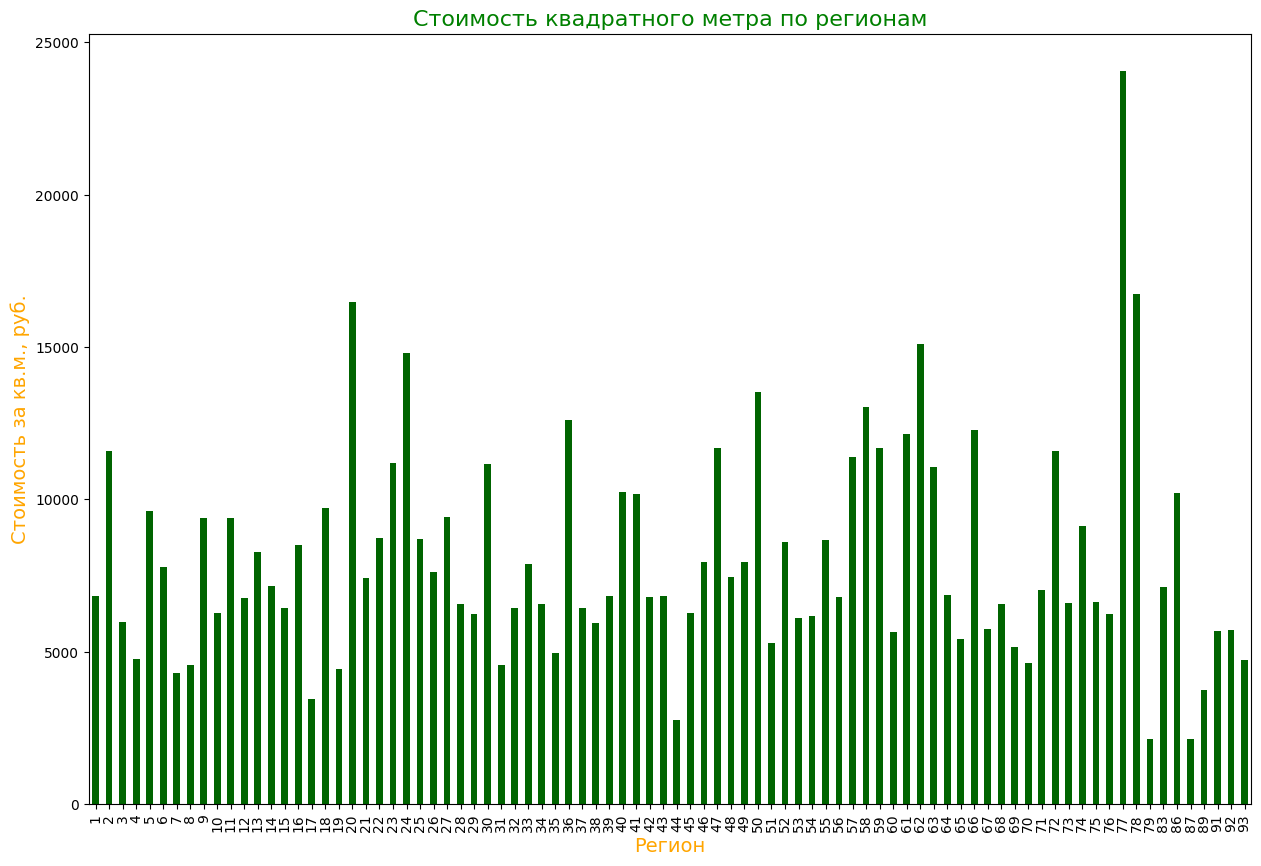

In [29]:
baza.visual()

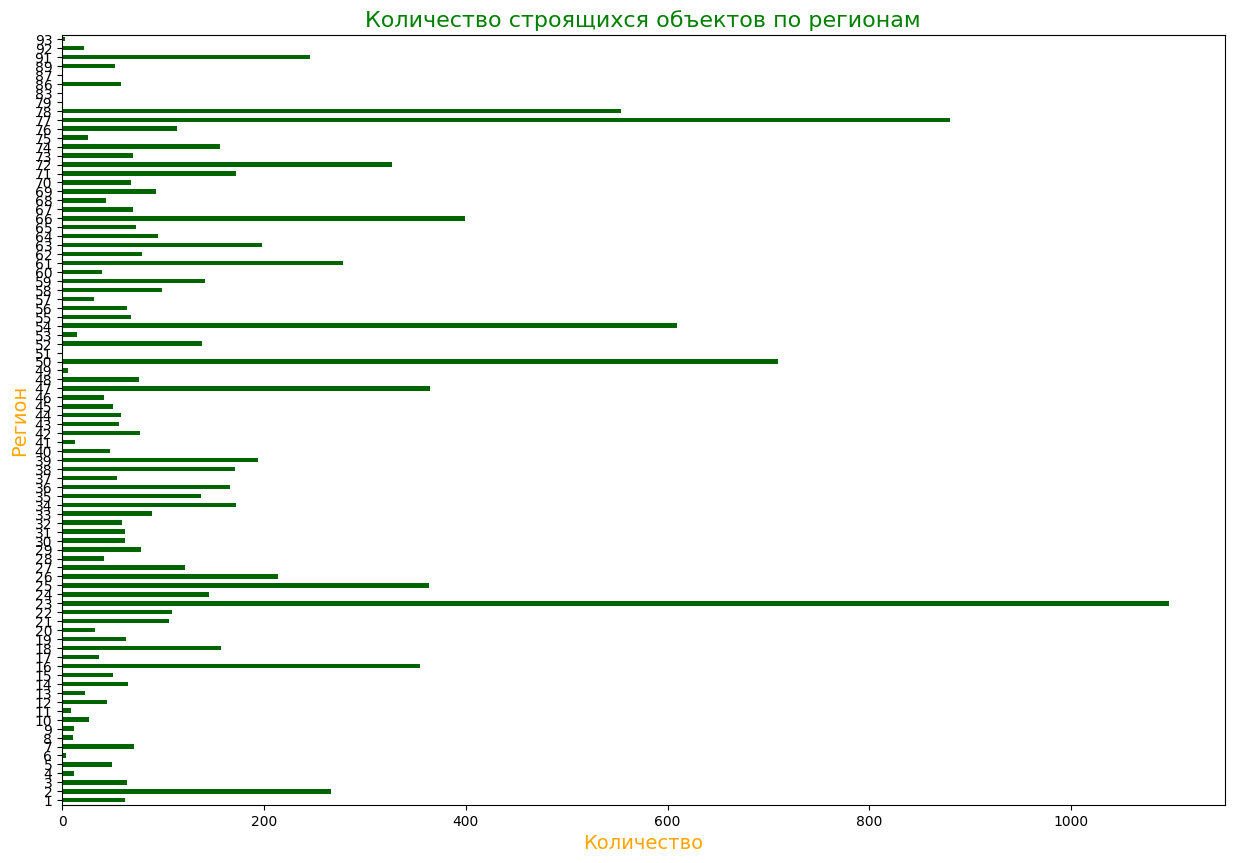

In [30]:
baza.volume()

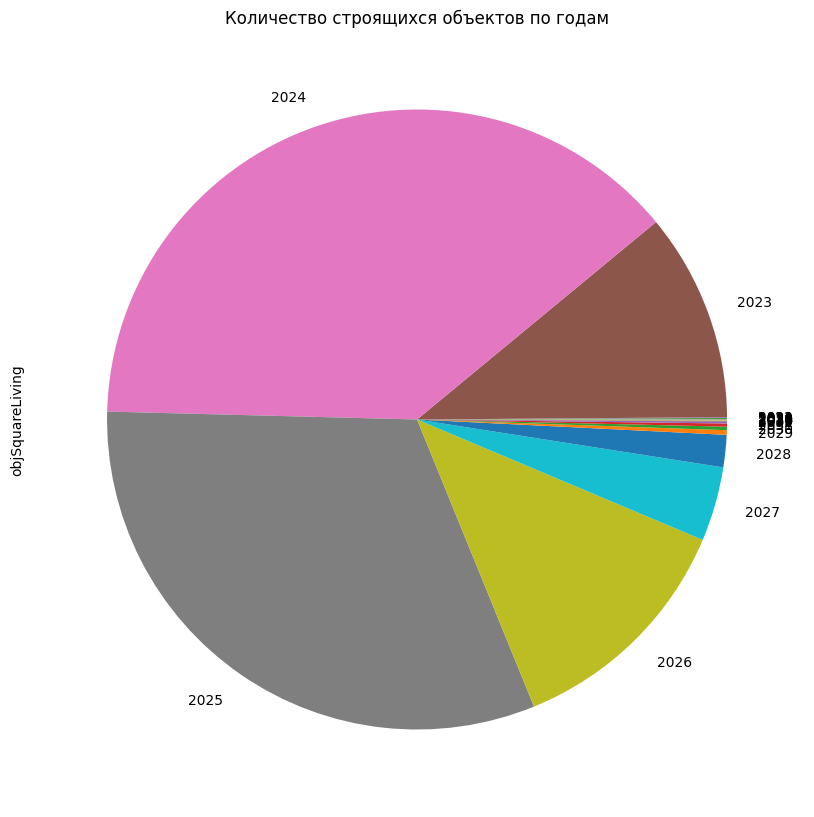

In [31]:
baza.volume_year()